## Table of contents
- [Class Distribution Summary](#cds)
- [Class Distribution Visualization](#cdv)
- [Pie Chart](#pie)
- [Visualizing Image Dimensions for Different Classes](#vid)

In [4]:
!pip check



No broken requirements found.


In [5]:
import cv2 
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data_path= 'skin disease/train/'

## Class Distribution Summary
<a id = 'cds'></a>
This section calculates the number of items in each class directory within the specified data path. It generates a summary of the distribution of data across different classes.
- **Classes Retrieval**: The os.listdir(data_path) function retrieves the list of class directories present in the data_path.

- **Counting Items**: For each class, the number of items is counted using  <code>len(os.listdir(os.path.join(data_path, class_name)))</code>  and stored in the dictionary.

In [9]:

    classes=os.listdir(data_path)
    dic={}
    for i in classes:
        dic[i]= len(os.listdir(os.path.join(data_path,i)))
    for key,value in dic.items():
        print(key,":",value,"\n")

Atopic Dermatitis Photos : 489 

Systemic Disease : 606 

Exanthems and Drug Eruptions : 404 

Warts Molluscum and other Viral Infections : 1086 

Acne and Rosacea Photos : 840 

Urticaria Hives : 212 

Herpes HPV and other STDs Photos : 405 

Poison Ivy Photos and other Contact Dermatitis : 260 

.ipynb_checkpoints : 0 

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 1150 

Scabies Lyme Disease and other Infestations and Bites : 431 

Light Diseases and Disorders of Pigmentation : 568 

Tinea Ringworm Candidiasis and other Fungal Infections : 1300 

Eczema Photos : 1235 

Vasculitis Photos : 416 

Nail Fungus and other Nail Disease : 1040 

Hair Loss Photos Alopecia and other Hair Diseases : 239 

Lupus and other Connective Tissue diseases : 420 

Vascular Tumors : 482 

Seborrheic Keratoses and other Benign Tumors : 1371 

Cellulitis Impetigo and other Bacterial Infections : 288 

Melanoma Skin Cancer Nevi and Moles : 463 

Bullous Disease Photos : 448 

Psorias

## Class Distribution Visualization
<a id="cdv"></a>

This section provides a visual representation of the number of files in each class.
#### Detecting Class Imbalance:
Class imbalance refers to unequal distribution of data across different classes in a dataset. It's crucial to identify because it can lead to biased models that favor classes with more examples. For instance, in a medical image dataset, detecting a significant disproportion between healthy and diseased samples ensures the model doesn't overlook rare but critical cases.

#### Guiding Preprocessing Strategies:
Effective preprocessing adapts to the dataset's class distribution to improve model performance. Techniques like oversampling minority classes or augmenting data for underrepresented categories ensure a balanced representation during training.

#### Setting Performance Expectations:
The dataset's class distribution influences the choice of evaluation metrics and the interpretation of model results. Metrics such as precision, recall, and F1-score provide a more nuanced assessment than overall accuracy, particularly in imbalanced datasets.

#### Influencing Model Selection:
Awareness of class distribution aids in selecting models and architectures that handle imbalanced data effectively. Models equipped with techniques like class weighting or specialized loss functions mitigate biases towards dominant classes, ensuring fair representation of all classes.



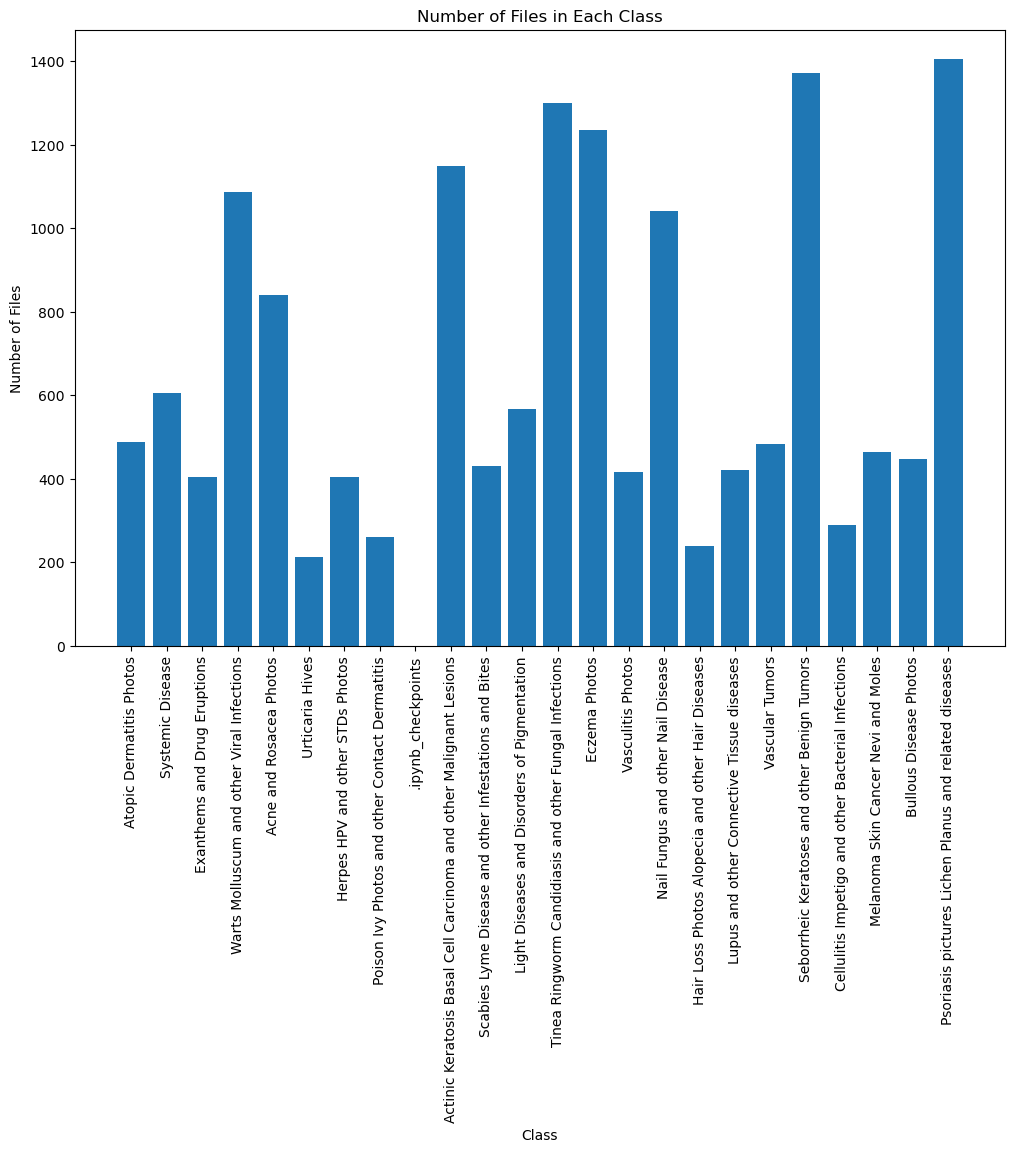

In [10]:
plt.figure(figsize=(12, 8))
plt.bar(dic.keys(), dic.values())
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Class')
plt.show()

#### Pie chart visualization
<a id = 'pie'></a>

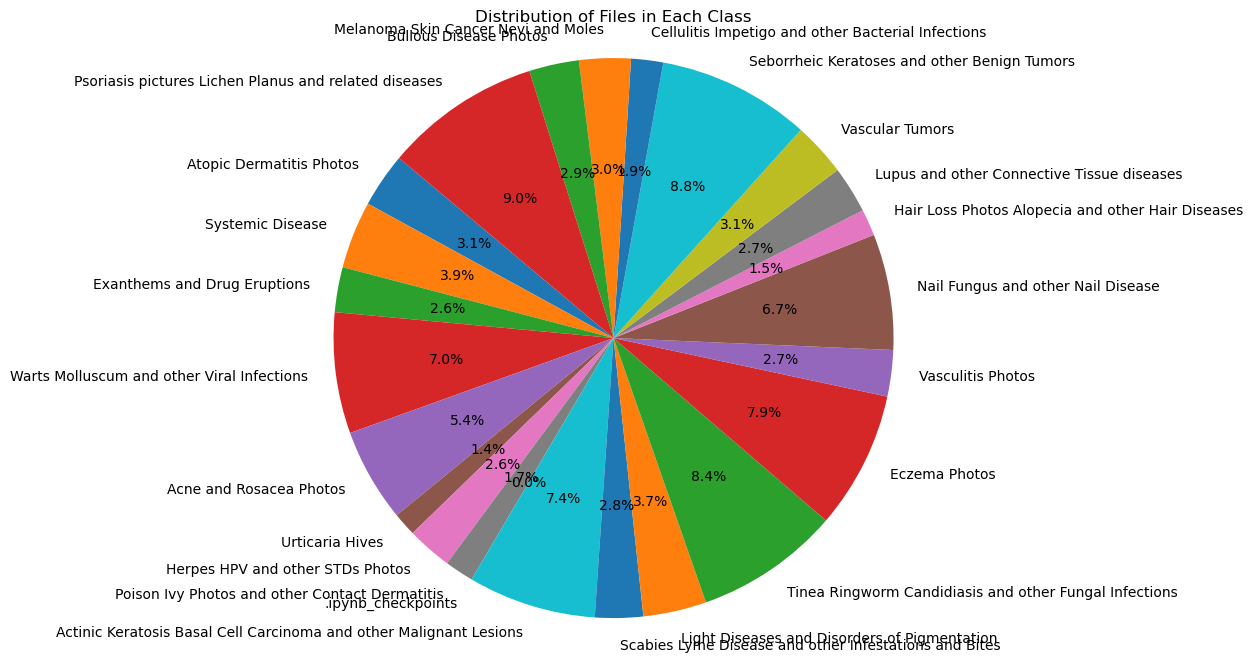

In [11]:
plt.figure(figsize=(12, 8))
plt.pie(dic.values(), 
        labels=dic.keys(), 
        autopct='%1.1f%%', 
        startangle=140, 
        textprops={'fontsize': 10}) 

plt.axis('equal') 
plt.title('Distribution of Files in Each Class')
plt.show()

In [6]:
#CLASSES WITH MAXIMUM ELEMENTS

sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
top_classes = dict(list(sorted_dic.items())[:10])
for key, value in top_classes.items():
    print(key, ":", value, "\n")

Psoriasis pictures Lichen Planus and related diseases : 1405 

Seborrheic Keratoses and other Benign Tumors : 1371 

Tinea Ringworm Candidiasis and other Fungal Infections : 1300 

Eczema Photos : 1235 

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 1149 

Warts Molluscum and other Viral Infections : 1086 

Nail Fungus and other Nail Disease : 1040 

Acne and Rosacea Photos : 840 

Systemic Disease : 606 

Light Diseases and Disorders of Pigmentation : 568 



In [7]:
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    file = os.listdir(folder_path)
    num_train = int(0.8 * len(file))
    files_train = random.sample(file, num_train)
    files_val = list(set(file) - set(files_train))
    
    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        train_data.append((img, folder))
        
    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        val_data.append((img, folder))

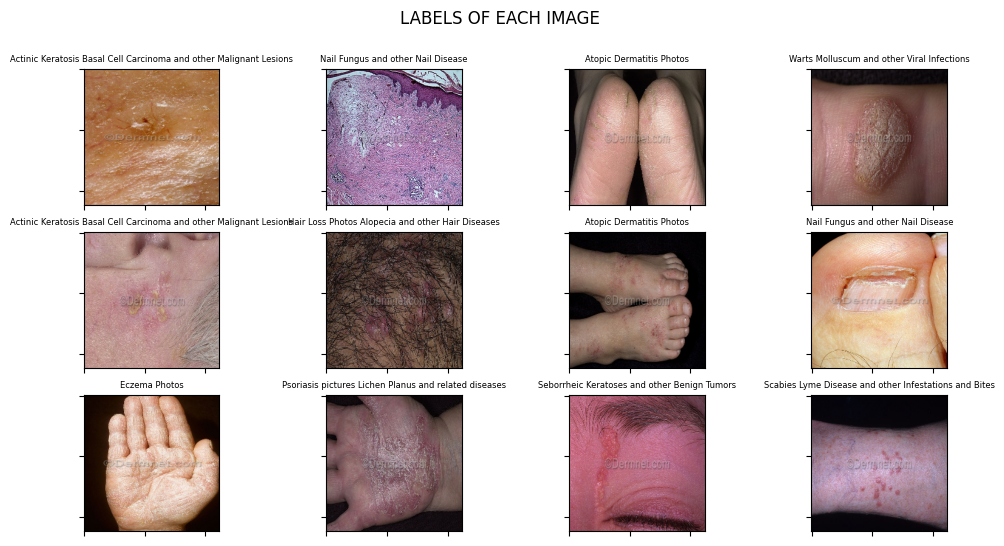

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(12, 6))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 12), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(False)
    ax.set_title(label)
    ax.set_title(label, fontsize=6)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

In [9]:
 directories = {}
classes = []
for dirname , _ , files in os.walk('/kaggle/input/dermnet/train'):
    className = dirname.rsplit('/',maxsplit = 1)[1]
    if (className != 'test' and className != 'train'): directories[className] = dirname
    classes.append(className)
classes.pop(0)
no_of_classes = len(classes)
print(classes)
print(no_of_classes)

['Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Acne and Rosacea Photos', 'Systemic Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Vascular Tumors', 'Urticaria Hives', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Psoriasis pictures Lichen Planus and related diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Scabies Lyme Disease and other Infestations and Bites', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Seborrheic Keratoses and other Benign Tumors', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Vasculitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Warts Molluscum and other Viral Infections']
23


In [10]:
def get_dimensions(filePath):
    img = cv2.imread(filePath)
    x , y , _ = img.shape
    return (x,y)

In [11]:
print(directories)

{'Light Diseases and Disorders of Pigmentation': '/kaggle/input/dermnet/train/Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases': '/kaggle/input/dermnet/train/Lupus and other Connective Tissue diseases', 'Acne and Rosacea Photos': '/kaggle/input/dermnet/train/Acne and Rosacea Photos', 'Systemic Disease': '/kaggle/input/dermnet/train/Systemic Disease', 'Poison Ivy Photos and other Contact Dermatitis': '/kaggle/input/dermnet/train/Poison Ivy Photos and other Contact Dermatitis', 'Vascular Tumors': '/kaggle/input/dermnet/train/Vascular Tumors', 'Urticaria Hives': '/kaggle/input/dermnet/train/Urticaria Hives', 'Atopic Dermatitis Photos': '/kaggle/input/dermnet/train/Atopic Dermatitis Photos', 'Bullous Disease Photos': '/kaggle/input/dermnet/train/Bullous Disease Photos', 'Hair Loss Photos Alopecia and other Hair Diseases': '/kaggle/input/dermnet/train/Hair Loss Photos Alopecia and other Hair Diseases', 'Tinea Ringworm Candidiasis and other Fungal In


## Visualizing Image Dimensions for Different Classes
<a id = 'vid'></a>
### 1. Identifying Dimension Patterns
By visualizing the dimensions (height and width) of images across different classes, you can identify patterns and anomalies in image sizes. This is crucial for understanding the dataset's structure and ensuring consistency.
Example: If certain classes consistently have smaller or larger images, this might impact the model's performance and require normalization or resizing during preprocessing.

### 2. Detecting Outliers
Scatter plots help in spotting outliers that may not be immediately apparent through summary statistics alone. Outliers in image dimensions can indicate errors in data collection or labeling that need to be addressed.

### 3. Improving Model Performance
Consistent image dimensions can enhance model performance by reducing the variability that the model needs to learn. This can lead to faster convergence and better generalization.



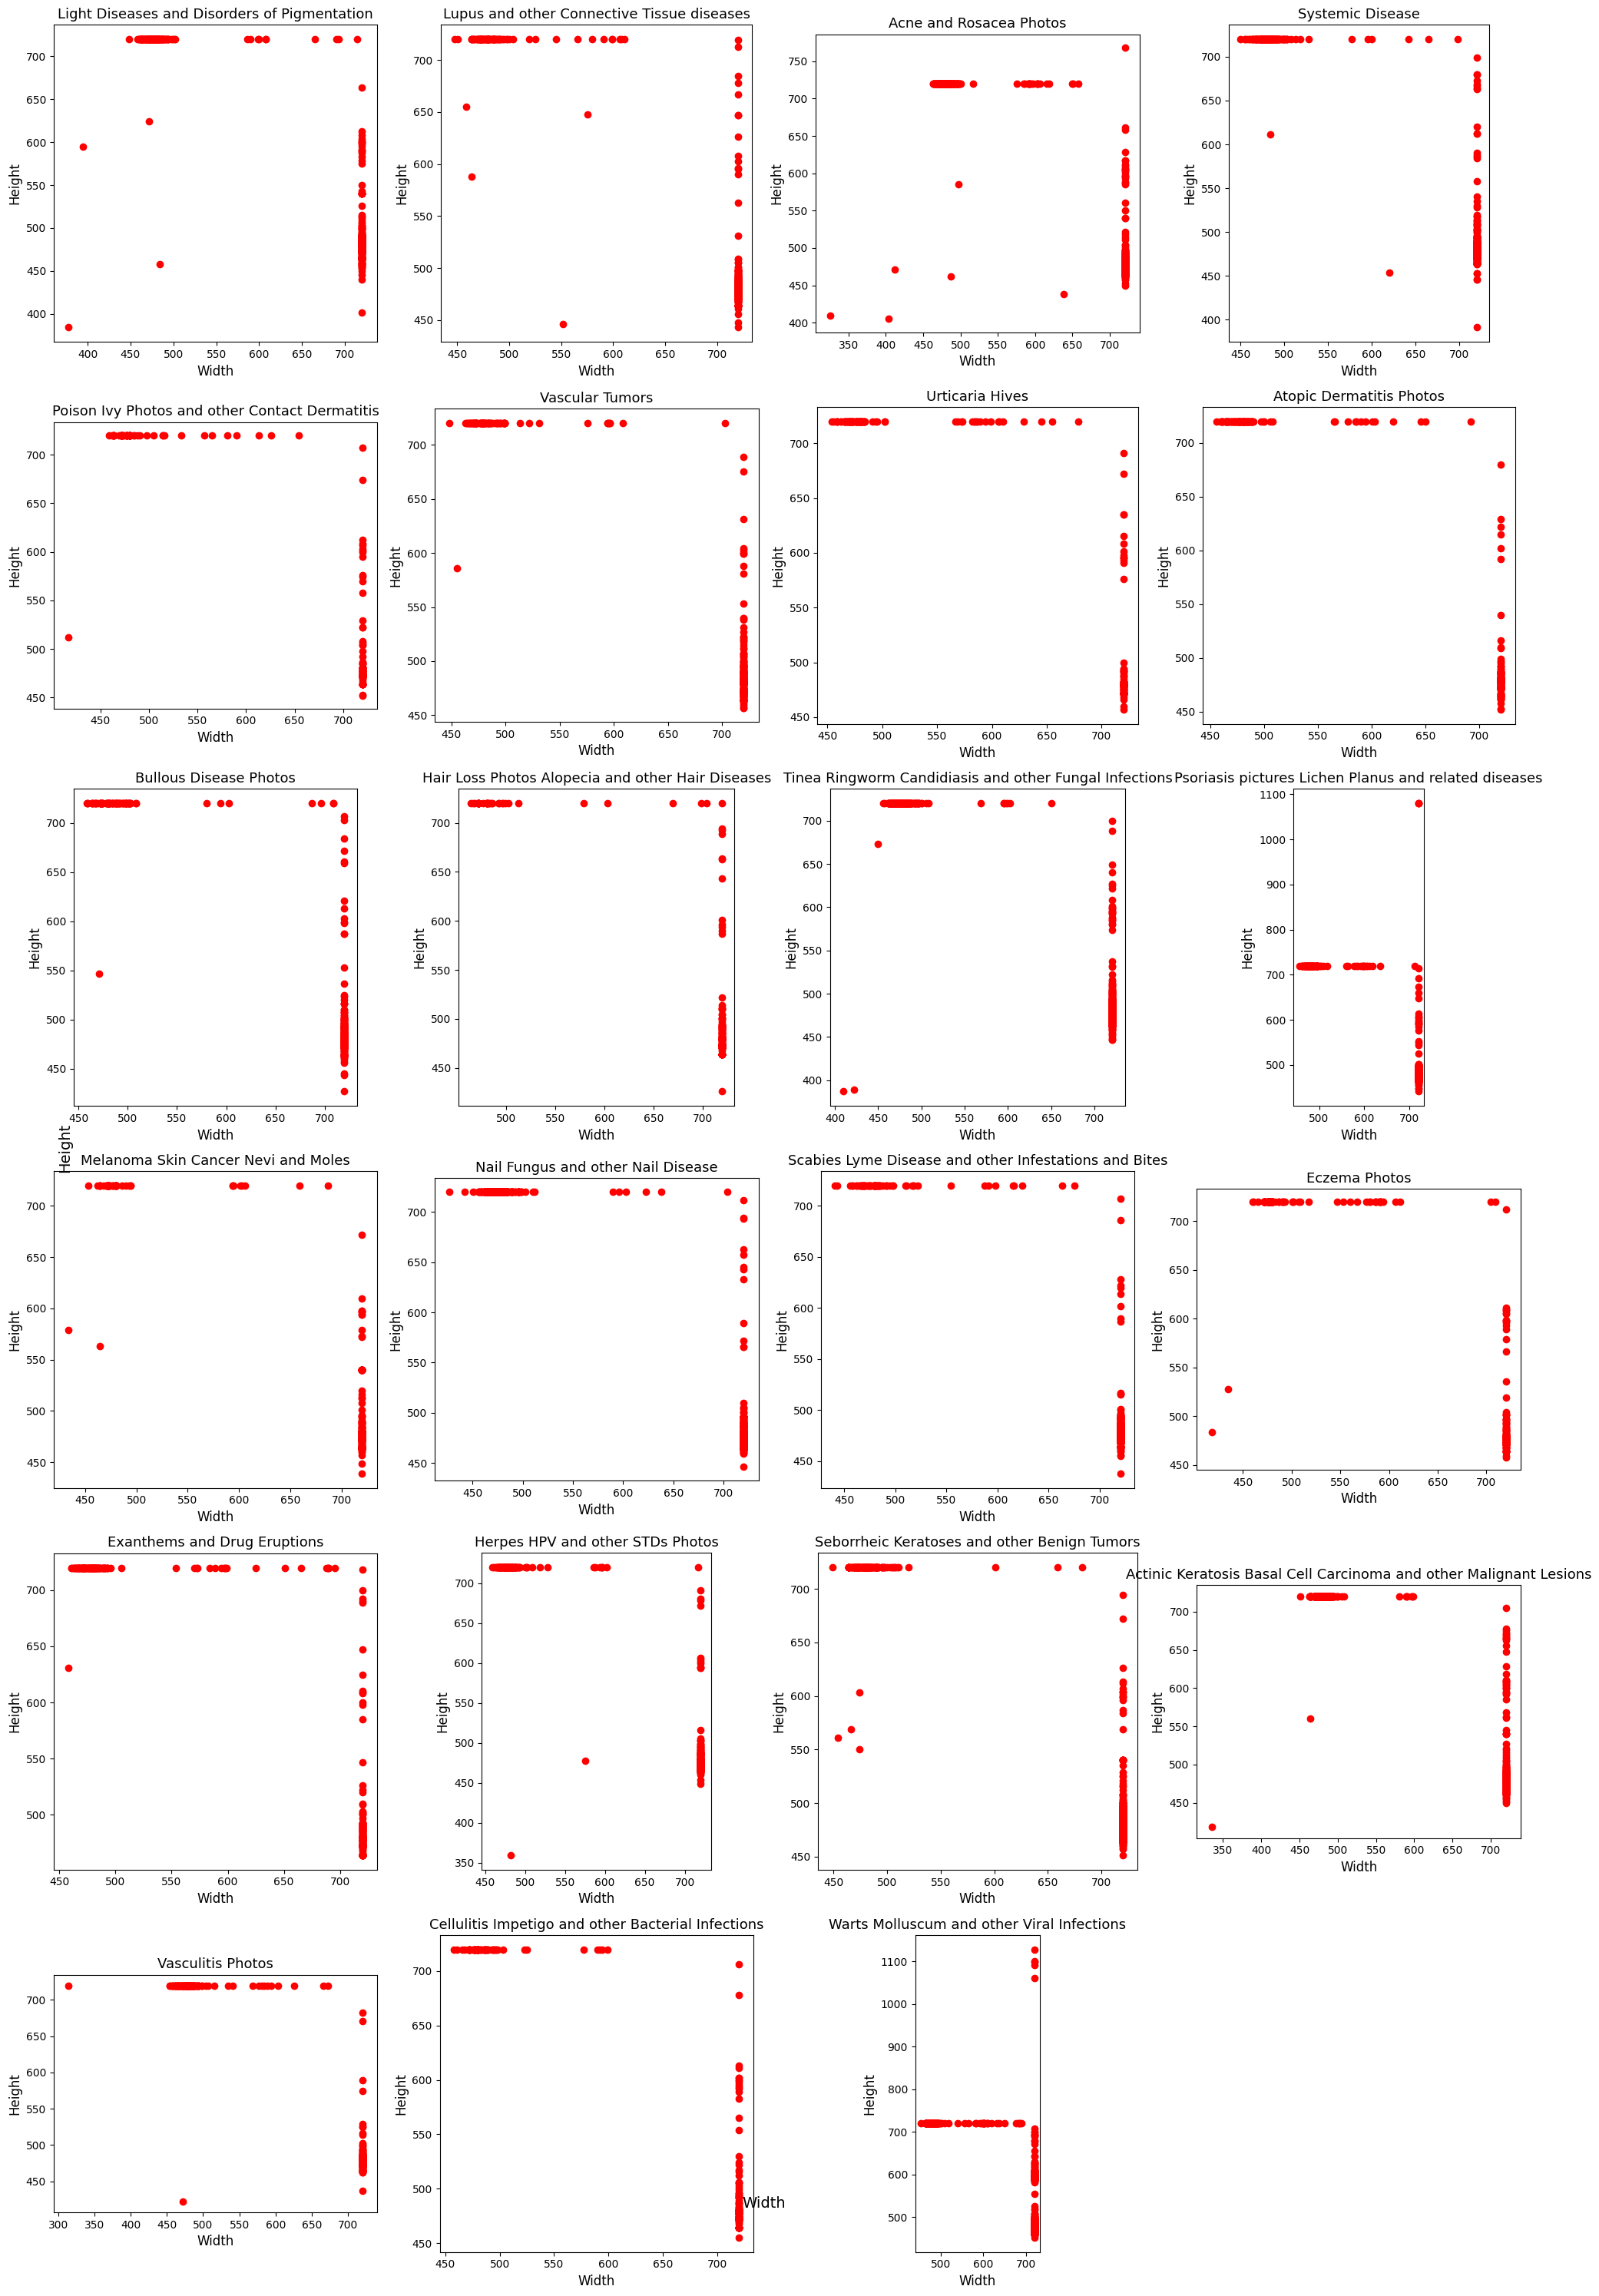

In [12]:
cols = 4
rows = (no_of_classes + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 5))

axs = axs.flatten()
heights_all = []
widths_all = []
for idx, (className, direc) in enumerate(directories.items()):
    x = []
    y = []
    for root, dirs, files in os.walk(direc):
        for img in files:
            h, w = get_dimensions(os.path.join(root, img))
            widths_all.append(w)
            x.append(w)
            heights_all.append(h)
            y.append(h)
    axs[idx].scatter(x, y, color='red')
    axs[idx].set_title(className, fontsize=13)
    axs[idx].set_xlabel('Width', fontsize=12)
    axs[idx].set_ylabel('Height', fontsize=12)

    axs[idx].set_aspect('equal')

for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

fig.text(0.5, 0.04, 'Width', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Height', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.show()

### Visualizing dimensions of all images irrespective of class

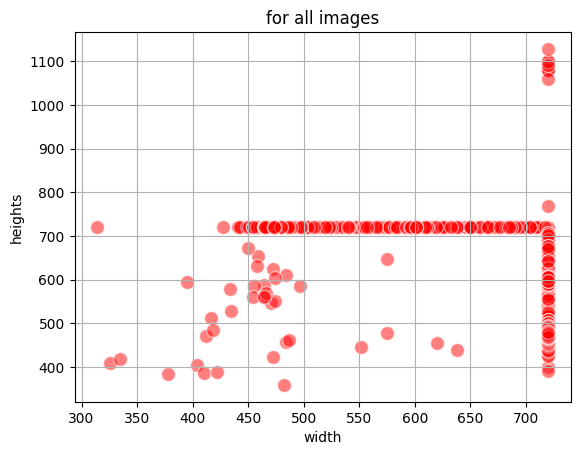

In [13]:
plt.scatter(widths_all, heights_all, color='red', s=100, alpha=0.5, edgecolors='w')

plt.xlabel('width')
plt.ylabel('heights')
plt.title('for all images')

plt.grid(True)

plt.show()